## 寻找配对
- 根据累积收益率最小距离筛选pairs

In [1]:
import pickle
from itertools import combinations
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/preprocessed.csv")
with open("data/cumReturn.bin", "rb") as f:
    returns = pickle.load(f)

In [3]:
data.head()

,date,asset,close,volume
0,2017-01-03,LLDPE,9710.0,415780.0
1,2017-01-03,PTA,5446.0,2106438.0
2,2017-01-03,动力煤,493.0,102390.0
3,2017-01-03,天然橡胶,18360.0,352158.0
4,2017-01-03,棉花,15085.0,184116.0


In [4]:
assets = returns.keys()

In [5]:
def calSSD(x1, x2):
    '''
    @Description
    计算两个序列的距离，返回square sum of deviation
    ------------
    @Params
    x1, x2, Series
    ------------
    @Returns
    ssd, float
    '''
    return np.sum((x1-x2)**2)

In [6]:
def normalize(x):
    '''
    @Description
    min-max归一
    ------------
    @Params
    x, Series
    ------------
    @Returns
    x1, Series
    '''
    return (x-x.min())/(x.max()-x.min())

In [7]:
# 指定形成期12个月
dates = data["date"].unique()
print(len(dates))

1075


In [8]:
dates

array(['2017-01-03', '2017-01-04', '2017-01-05', ..., '2021-06-02',
       '2021-06-03', '2021-06-04'], dtype=object)

In [9]:
start_date = sum(dates<="2018-01-01")
# form_days = sum(dates<="2018-01-03")

In [10]:
start_date

244

In [12]:
end_date = sum(dates<="2019-01-01")

In [13]:
end_date

487

In [22]:
# 两两组合计算SSD
SSDs = {}
for asset1, asset2 in combinations(assets, 2):
    # 去除第一个NaN后，应该是[0:form_days-1]
    return1 = normalize(returns[asset1].dropna().values[start_date:end_date])
    return2 = normalize(returns[asset2].dropna().values[start_date:end_date])
    SSDs[f"{asset1}-{asset2}"] = calSSD(return1, return2)

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# from matplotlib.font_manager import FontProperties
# zhfont = FontProperties(fname="/System/Library/Fonts/PingFang.ttc")

In [17]:
# 形成期
# data[data["asset"]=="热轧卷板"].iloc[:form_days,:]

In [18]:
# 交易期
# data[data["asset"]=="热轧卷板"].iloc[form_days:end_date,:]

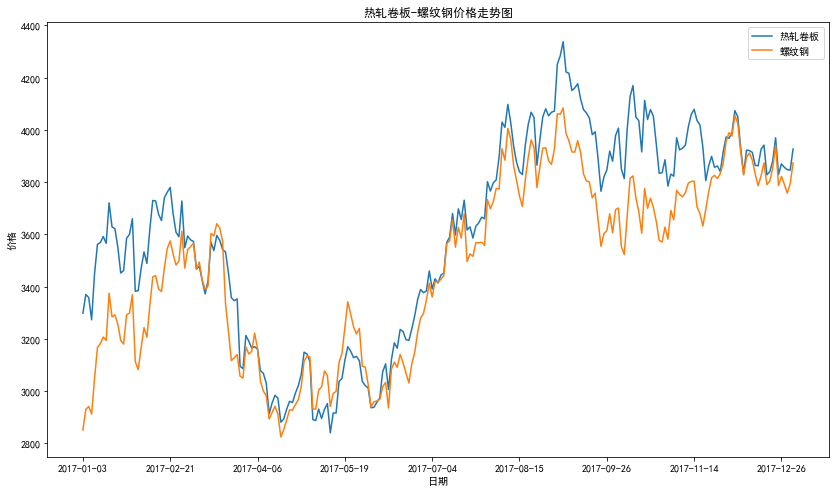

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))
d1 = data[data["asset"]=="热轧卷板"].iloc[:245,:]
d2 = data[data["asset"]=="螺纹钢"].iloc[:245, :]
ax.plot(d1.date, d1.close, label=u"热轧卷板")
ax.plot(d2.date, d2.close, label=u"螺纹钢")
# plt.tight_layout()
# ax.legend(prop=zhfont)
ax.legend()
ax.set_xlabel(u"日期")
ax.set_ylabel(u"价格")
ax.set_title(u"热轧卷板-螺纹钢价格走势图")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.show()

In [26]:
# 按SSD大小排序
SSDs = sorted(SSDs.items(), key=lambda d:d[1])

In [28]:
# 导出
with open("data/SSDs.bin", "wb") as f:
    pickle.dump(SSDs, f)

In [29]:
# test 读入
with open("data/SSDs.bin", "rb") as f:
    SSDs = pickle.load(f)

## 相关性热力图
- 根据形成期作图
- 挑选出最前面的几个品种作图

In [31]:
# 相关性热力图# 相关性热力图
import seaborn as sns

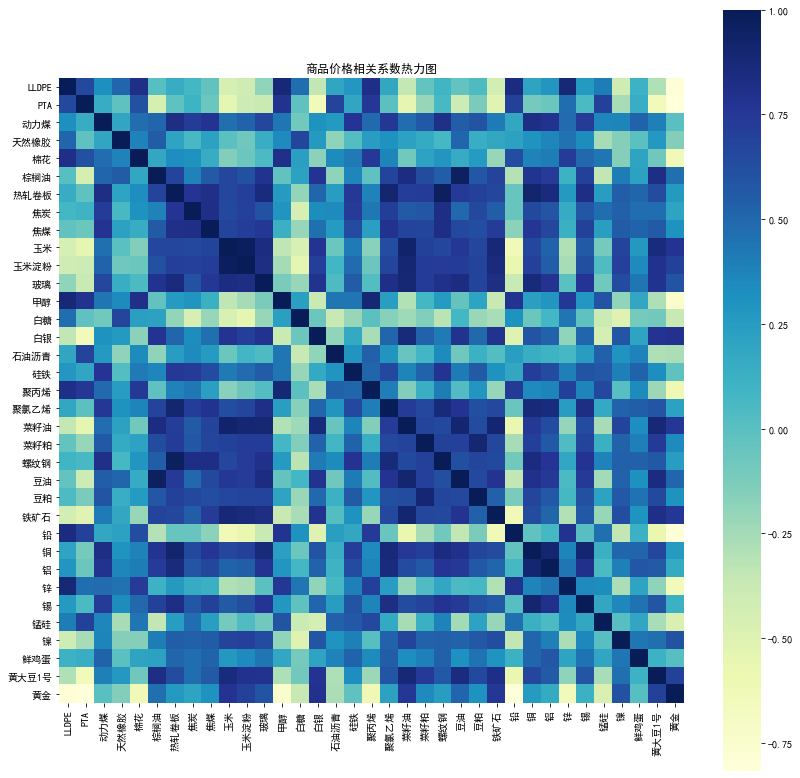

In [32]:
fig, ax = plt.subplots(figsize=(14, 14))
# 获取所有价格列表
temp = pd.DataFrame(dict(map(lambda d:(d[0], d[1].values),returns.items())))
sns.heatmap(temp.corr(), ax=ax, square=True, annot=False, yticklabels=True, cmap="YlGnBu")
ax.set_title("商品价格相关系数热力图")
plt.savefig("期货合约相关性热力图.jpg", dpi=300)
plt.show()

In [1]:
# TODO 
# 筛选前几个

In [6]:
with open("data/SSDs.bin", "rb") as f:
    SSDs = pickle.load(f)
    f.close()
data = pd.read_csv("data/preprocessed.csv")

In [8]:
assets = []
for pairs, SSD in SSDs[:5]:
    a1, a2 = pairs.split("-")
    assets.append(a1)
    assets.append(a2)

In [16]:
temp = {}
for a in assets:
    temp[a] = returns[a]

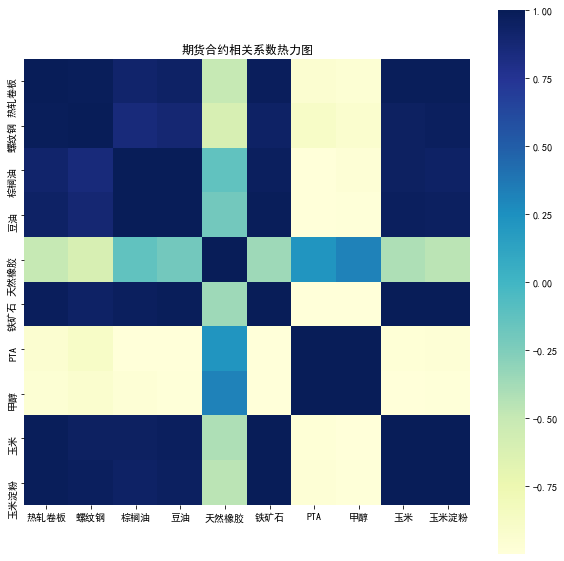

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
# 获取所有价格列表
temp = pd.DataFrame(dict(map(lambda d:(d[0], d[1].values),temp.items()))).corr()
sns.heatmap(temp.corr(), ax=ax, square=True, annot=False, yticklabels=True, cmap="YlGnBu")
ax.set_title("期货合约相关系数热力图")
plt.show()

In [13]:
# pd.DataFrame(data=returns)
pd.DataFrame(dict(map(lambda d:(d[0], d[1].values),returns.items()))).corr()